### All packages needed for this project are here:

In [1]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression

# Show the plots inline in the notebook
%matplotlib inline

## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is one of the classic supervised machine learning algorithms which assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`.

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1500 rows from the dataframe using your id as a seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: as mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable, gluc (about glucose levels), which is one-hot-encoded for you. It has similar values as cholesterol originally had [normal, at risk, elevated].*

In [2]:

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [3]:
# Defining student_id ass the seed for sampling to ensure getting the random sample
my_id = 2310107
#Sampling the data
sample_cardio_data = cardio_data.sample(n=1500, random_state=my_id)
# print first 15 rows of sampled data
sample_cardio_data.head(15)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
560,55,1,163,80.0,110,80,0,0,0,0,1,0,0,1,0,0
3584,62,1,156,94.0,120,80,0,0,1,0,1,0,0,1,0,0
3380,54,1,158,100.0,130,90,0,0,1,0,0,0,1,0,0,1
1535,51,2,169,59.0,110,70,0,0,1,0,0,1,0,1,0,0
5646,63,1,154,72.0,180,100,0,0,1,1,0,0,1,0,0,1
328,46,1,168,70.0,120,80,0,0,0,0,1,0,0,1,0,0
2269,45,1,160,60.0,120,80,0,0,1,0,1,0,0,1,0,0
2130,57,1,165,65.0,120,80,0,0,0,0,1,0,0,1,0,0
1720,41,1,162,51.0,120,80,1,1,1,0,1,0,0,1,0,0
4462,40,1,157,110.0,140,80,0,0,1,1,1,0,0,1,0,0


In [4]:
from sklearn.calibration import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

encoder = LabelEncoder()
cardio_data['gender'] = encoder.fit_transform(cardio_data['gender'])
cardio_data.head(15)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
0,48,1,170,104.0,120,80,0,0,1,0,1,0,0,1,0,0
1,51,0,160,59.0,110,80,0,0,1,0,0,1,0,1,0,0
2,42,1,166,77.0,120,80,0,0,1,0,1,0,0,1,0,0
3,55,0,168,80.0,120,80,0,0,1,0,1,0,0,1,0,0
4,57,0,154,41.0,806,0,0,0,1,0,1,0,0,1,0,0
5,53,0,152,56.0,103,65,0,0,1,0,1,0,0,1,0,0
6,42,0,167,67.0,110,70,0,0,1,0,1,0,0,1,0,0
7,41,1,172,70.0,110,80,0,0,1,0,1,0,0,1,0,0
8,43,1,169,67.0,100,80,0,0,1,0,1,0,0,1,0,0
9,39,1,168,60.0,120,80,0,0,1,0,1,0,0,0,1,0


----

We have the data so now, let's put it to use. 
To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

**Exercise 1 B)**

Collect the features as an array named `features`, and the target variable as an array named `labels`. Create training and test data by randomly splitting the data into training (80%) and test (20%) sets.

- Do you need stratification for our dataset? Explain your decision.

In [5]:
### Code - Train-test split
from sklearn.model_selection import train_test_split
features = cardio_data[['age',
             'gender',
             'height',
             'weight',
             'ap_hi',
             'ap_lo',
             'smoke',
             'alco',
             'active',
             'cholesterol_normal',
             'cholesterol_elevated',
             'cholesterol_high',
             'gluc_normal',
             'gluc_elevated',
             'gluc_high']]
labels = cardio_data['cardio']

# random_state is used to ensure random split is reproducible 80% trainin set and 20% test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2,random_state=42, stratify = labels)

#Checking the balance of target variable
print(cardio_data['cardio'].value_counts())

cardio
0    4200
1    1800
Name: count, dtype: int64


In [6]:
#checking features trained data heads
print(features_train.head())


      age  gender  height  weight  ap_hi  ap_lo  smoke  alco  active  \
297    52       1     170    75.0    120     80      0     0       1   
572    51       0     169    82.0    120     80      0     0       1   
2295   45       1     167    69.0    110     70      0     0       0   
5457   44       0     155    59.0    120     80      0     0       1   
4493   53       1     171    74.0    120     80      0     0       1   

      cholesterol_normal  cholesterol_elevated  cholesterol_high  gluc_normal  \
297                    1                     0                 0            1   
572                    1                     0                 0            1   
2295                   1                     0                 0            1   
5457                   1                     0                 0            1   
4493                   1                     0                 0            1   

      gluc_elevated  gluc_high  
297               0          0  
572           

In [7]:
#checking features train data heads
print(features_train.head())
#checking labes train data heads
print(labels_train.head())

      age  gender  height  weight  ap_hi  ap_lo  smoke  alco  active  \
297    52       1     170    75.0    120     80      0     0       1   
572    51       0     169    82.0    120     80      0     0       1   
2295   45       1     167    69.0    110     70      0     0       0   
5457   44       0     155    59.0    120     80      0     0       1   
4493   53       1     171    74.0    120     80      0     0       1   

      cholesterol_normal  cholesterol_elevated  cholesterol_high  gluc_normal  \
297                    1                     0                 0            1   
572                    1                     0                 0            1   
2295                   1                     0                 0            1   
5457                   1                     0                 0            1   
4493                   1                     0                 0            1   

      gluc_elevated  gluc_high  
297               0          0  
572           

In [8]:
print("For Train and Test cardio Mean")
print(labels_train.mean(), labels_test.mean())

For Train and Test cardio Mean
0.3 0.3


Checking Stratification Here

In [9]:
# Checking In the original data
print("In the sampled cardio Data:")
print(sample_cardio_data['cardio'].value_counts(normalize=True))

# Checking In the original data
print("In the Origional cardio Data:")
print(cardio_data['cardio'].value_counts(normalize=True))

# In the training set
print("\n In Training Set:")
print(labels_train.value_counts(normalize=True))

# In the test set
print("\n In Test Set:")
print(labels_test.value_counts(normalize=True))

In the sampled cardio Data:
cardio
0    0.706667
1    0.293333
Name: proportion, dtype: float64
In the Origional cardio Data:
cardio
0    0.7
1    0.3
Name: proportion, dtype: float64

 In Training Set:
cardio
0    0.7
1    0.3
Name: proportion, dtype: float64

 In Test Set:
cardio
0    0.7
1    0.3
Name: proportion, dtype: float64


<font color = lightcoral> The value counts data shows about 70% samples belongs to class 0 and 30% beongs to class 1 so the data is slightly imbalanced but the class distribution shows consistent pattern in all data sample.The stratification in train_test_split did work correctly.So we don't need here.

----------
**Exercise 1 C)** 

Standardize the numerical features: Note that you should now have two separate features that you've divided all the features into.

- Describe how the k-NN model would make predictions about whether or not a patient has a CVD when the features are not standardized, and explain the reasons behind.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [10]:
# Define numerical and binary features
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
binary_features    = ['gender', 'smoke', 'alco', 'active', 'cholesterol_normal', 
                      'cholesterol_elevated', 'cholesterol_high', 'gluc_normal', 
                      'gluc_elevated', 'gluc_high']

# Function to fit the scaler
def fit_scaler(features_train, numerical_features):
    scaler = StandardScaler().fit(features_train[numerical_features])
    return scaler

# Function to scale the features of numerical data
def scale_features(features, numerical_features, scaler):
    features_scale = features.copy(deep=True)
    features_scale[numerical_features] = scaler.transform(features[numerical_features])
    return features_scale

# Fit the scaler using the training data
scaler = fit_scaler(features_train, numerical_features)

# Scale the training and test data
features_train_scale = scale_features(features_train, numerical_features, scaler)
features_test_scale = scale_features(features_test, numerical_features, scaler)

#Checking the features scale trained data
features_train_scale.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
297,-0.013537,1,0.661544,0.125244,-0.034354,-0.067929,0,0,1,1,0,0,1,0,0
572,-0.159885,0,0.541007,0.623197,-0.034354,-0.067929,0,0,1,1,0,0,1,0,0
2295,-1.037969,1,0.299935,-0.301573,-0.083750,-0.127345,0,0,0,1,0,0,1,0,0
5457,-1.184317,0,-1.146502,-1.012935,-0.034354,-0.067929,0,0,1,1,0,0,1,0,0
4493,0.132810,1,0.782080,0.054108,-0.034354,-0.067929,0,0,1,1,0,0,1,0,0


<font color = lightcoral> The k-NN model is distance based algorithm. The model assigns the new instance based on labels of nearest neighbours.For non standardized features the larger scale will dominate the distance calculation and effect the accuraty of prediction.Comparing the centimeters and kilometers the feature in kms will have smaller range of values and will have less impact on distance. So standardization before applying k-NN model is important because the standardized data make k-NN model more accurate predictions.</font>

------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

Confusion Matrix:
 [[705 135]
 [187 173]]


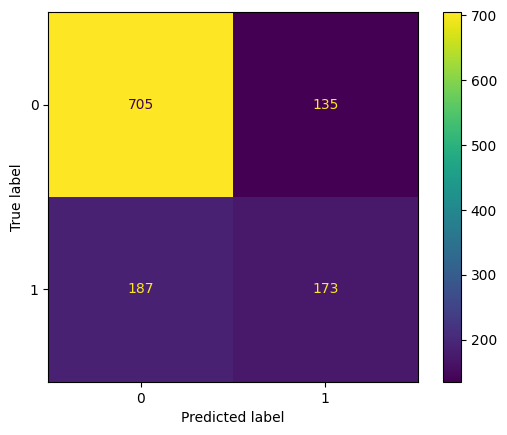

Accuracy: 0.73
Precision: 0.72
Recall: 0.73


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Create and fit the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(features_train, labels_train)

# Make predictions on the test set
y_predict = knn_model.predict(features_test)

#calculating the predicted probabilities of the positive class 
y_predict_probas = knn_model.predict_proba(features_test)[:,1]

# Confusion matrix
conf_matrix = confusion_matrix(labels_test, y_predict, labels=knn_model.classes_)
print(f"Confusion Matrix:\n {conf_matrix}")

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
cm_display.plot()
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(labels_test, y_predict)
precision = precision_score(labels_test, y_predict, average='weighted')
recall = recall_score(labels_test, y_predict, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


<font color = lightcoral> 
1)Bottom right 173 is true positive.Top left 705 means True (negative)0 class. Top right 135 represents false positives class.Bottom left 187 is false negatives.


2)Model perform well with class 0 lack with class 1.The accuracy of the model is 0.73. This means that 73% of the total predictions made by the model are correct.The precision is 0.72 suggests 72% of the positive predictions made by the model are actually positive. The recall 0.73 means that the model correctly identified 74% of the actual positives.
 
 
3)In our data imbalance of class can create in misleading of accuracy.It is also affected by evaluation metrics  
</font>


You randomly divided the data into two sets, one for training the k-NN model and the other for evaluating its performance. However, randomness is not the thing we really need, and in fact, it's not something we even desire. Instead, what we do want is to keep track of each step we're making and exporing. This said, the *reproducibility* of the results is extremely important in research. To achieve this, we can utilize <font color = lightcoral> a random seed</font>, with which we can re-run the codes and get the exact same results than before.

For example, we can use a fixed seed when we're shuffling the data before splitting it into training and test sets. This ensures that when we're re-runing the code, we obtain exactly the same partitions of the data in each split.

**Exercise 1 E)**

Initialize 1000 random seeds and continue with the k-NN model ($k=3$): Perform 1000 different train-test splits using these seeds and store the accuracies from each split. Plot the accuracies in a histogram, and discuss your results.

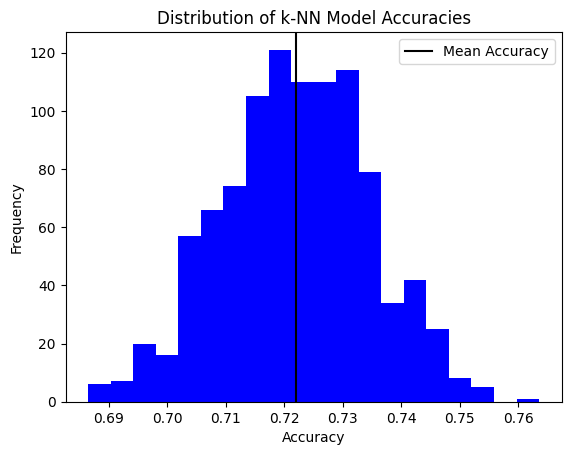

Mean Accuracy: 0.7219916666666667


In [12]:
random_seeds = np.random.randint(1, 10000, size=1000)

# Storing the accuracies from each split
accuracies = []

# Perform 1000 train-test splits using different seeds
for seed in random_seeds:
    # Splitting the data
    (random_features_train, random_features_test, random_labels_train, random_labels_test )= train_test_split(features_train, labels_train, test_size=0.2, random_state=seed)
    
    # Initialization of the k-NN model
    knn = KNeighborsClassifier(n_neighbors=3)

    # Train the model
    knn.fit(random_features_train, random_labels_train)

    # Making the predictions
    y_pred = knn.predict(random_features_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(random_labels_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies in a histogram
plt.hist(accuracies, bins=20, color='blue')
plt.axvline(np.mean(accuracies), color='black', label='Mean Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of k-NN Model Accuracies')
plt.legend()
plt.show()

# Printing the mean accuracy
print("Mean Accuracy:", np.mean(accuracies))

<font color = lightcoral> 0.7064 is an accuracy score, it means that the model correctly predicted 70.64% of the instances and sensitive to composition of training and test sets</font>

------

One really common evaluation metric is <font color = lightcoral>the area under the receiver operating characteristic (AUROC, AUC or AUC-ROC)</font>.  It provides a measure of a model's ability to distinguish between classes, especially in binary classification tasks between the <i>positive class</i> and the <i>negative class</i>. (There sure are multiclass and multilabel cases too, but they are out of scope here.) 

In our case, individuals who have a CVD form the positive class. As the name of the measure suggests, it combines two keys aspects to interpret a model's performance: ROC curves are about the trade-off between the true positive rate and the false positive rate, the former representing the model's ability to correctly identify individuals with a CVD (true positives) and the latter measuring the model's tendency to incorrectly classify individuals without a CVD as if they have the disease (false positives). Thus, the area beneath the curve is simply the AUROC, a single numerical value, that summarizes the overall performance.

**Exercise 1 F)** 

Evaluate the performance of the trained k-NN model by computing the AUROC and plotting the related curve. Draw also the line for random guesses.

- How well does the k-NN model perform in distinguishing between healthy individuals and those with a CVD?



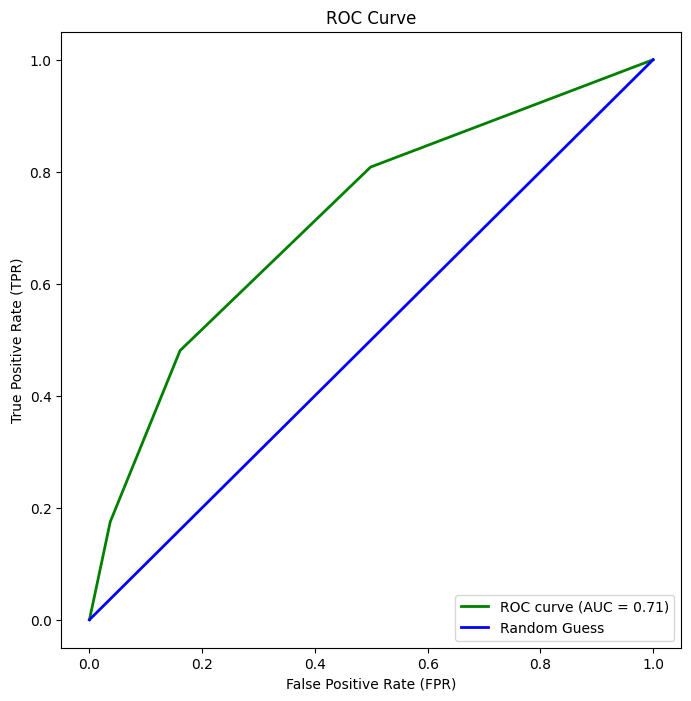

AUROC: 0.7148544973544974


In [13]:
### Code - ROC curve and AUROC

# Compute the ROC curve

fpr, tpr, threshold = metrics.roc_curve(labels_test, y_predict_probas)

# Computing the area under the ROC curve (AUROC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, label='Random Guess')
#plotting the figure
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUROC
print("AUROC:", roc_auc)

<font color = lightcoral> The AUROC curve evaluates the performance of a classification model by plotting true positive and false positive rateThe KNN model perform moderately well as it shows 71% accuracy to distinguish between healthy and diseased individuals</font>

## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire dataset on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This sure can be done manually, but `cross_val_score` is quite a handy function too.*

In [14]:

# Performing Leave-One-Out Cross-Validation
loo_cv = LeaveOneOut()
print(loo_cv.get_n_splits(labels))

# Store accuracies from each split

# Train the model
knn.fit(features_train, labels_train)

    # Make predictions
y_pred = knn.predict(features_test)

accuracy = accuracy_score(labels_test, y_pred)
accuracies.append(accuracy)

#scaling entire data
scale_features = features.copy(deep=True)
scale_features[numerical_features] = StandardScaler().fit_transform(features[numerical_features])
loo_cv_accuracy = cross_val_score(knn_model, features_train, labels_train, cv=loo_cv, scoring='accuracy', n_jobs = -1)

# Print the accuracy for each fold
print("Accuracy for each fold:", loo_cv_accuracy)

# Print the mean accuracy
print("Mean Accuracy:", loo_cv_accuracy.mean())
print(scale_features.shape[0])

6000
Accuracy for each fold: [1. 1. 0. ... 1. 1. 1.]
Mean Accuracy: 0.7229166666666667
6000


<font color = royalblue> The mean acuracy with LOOCV is similar to previous value that is 70%.So modal's performance is consistent with different train-test splits</font>

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire dataset.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [ ]:
  ### Code - Leave-one-out cross-validation
loo_cv = LeaveOneOut()

#check labels
print(loo_cv.get_n_splits(labels))

cv_accuracies_list = []

 # Scaling entrire data
scale_features = features.copy(deep=True)
scale_features[numerical_features] = StandardScaler().fit_transform(features[numerical_features])


for k in range(1,31,1):
  
    # Createing and fit the k-NN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
   #using LOOCV to evaluate model
    scores = cross_val_score(knn_model, scale_features, labels.values.ravel(), scoring='accuracy',cv=loo_cv, n_jobs = -1)
    #scores = cross_val_score(knn_model, scale_features, labels.values.ravel(), scoring='accuracy', cv=loo_cv, n_jobs=1)

    cv_accuracies_list.append(scores.mean())

# Print the mean accuracies
for k, accuracy in enumerate(cv_accuracies_list, start=1):
    print(f"Mean LOOCV Accuracy for k={k}: {accuracy:.2f}")

In [ ]:
# Plot accuracies vs. k values
# Values for k
k_values = list(range(1, 31))
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies_list, marker='o', linestyle='-', color='blue')
plt.title('LOOCV Mean Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('LOOCV Mean Accuracy')
plt.grid(True)
plt.show()

<font color = green>The loo_cv mean accuracy is shown from 0 to  1.In k= 27 the accuracy is lowest at 0.74.Accuracy decreases with the k value and drop down and again goes up that goes down and up continuous. It shows Accuracy for different values of k in a k-Nearest Neighbors (k-NN) model.In k value 27th it reaches to peak 0.75.his suggests that considering 27 nearest neighbors leads to the best model performance according to this metric.Higher LOOCV accuracy indicates a better fit of the model to the data but still other factors should be considered</font>

## <font color = darkorange> 5. Comparison of ridge regression and k-NN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healty/sick) to estimating continuous values. The following exercises are going to involve utilizing two different regression models, <font color = darkorange>Ridge Regression</font> and <font color = darkorange>K-Nearest Neighbors (k-NN) Regression</font>, and our goal is to evaluate and compare the performances of these two models.

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as

- <b>sex</b>: Gender, either male (0) or female (1)
- <b>age</b>: Age in years
- <b>len_head</b>: Head length in cm
- <b>width_skull</b>: Skull width in mm
- <b>len_total</b>: Total length in cm
- <b>len_tail</b>: Tail length in cm
- <b>len_foot</b>: Foot length 
- <b>len_earconch</b>: Ear conch length 
- <b>width_eye</b>: Distance from medial canthus to lateral canthus of right eye, i.e., eye width
- <b>chest</b>: Chest grit in cm
- <b>belly</b>: Belly grit in cm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [23]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------
# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examing those relationships between the variables in the given dataset.


**Exercise 5 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

<Figure size 1200x400 with 0 Axes>

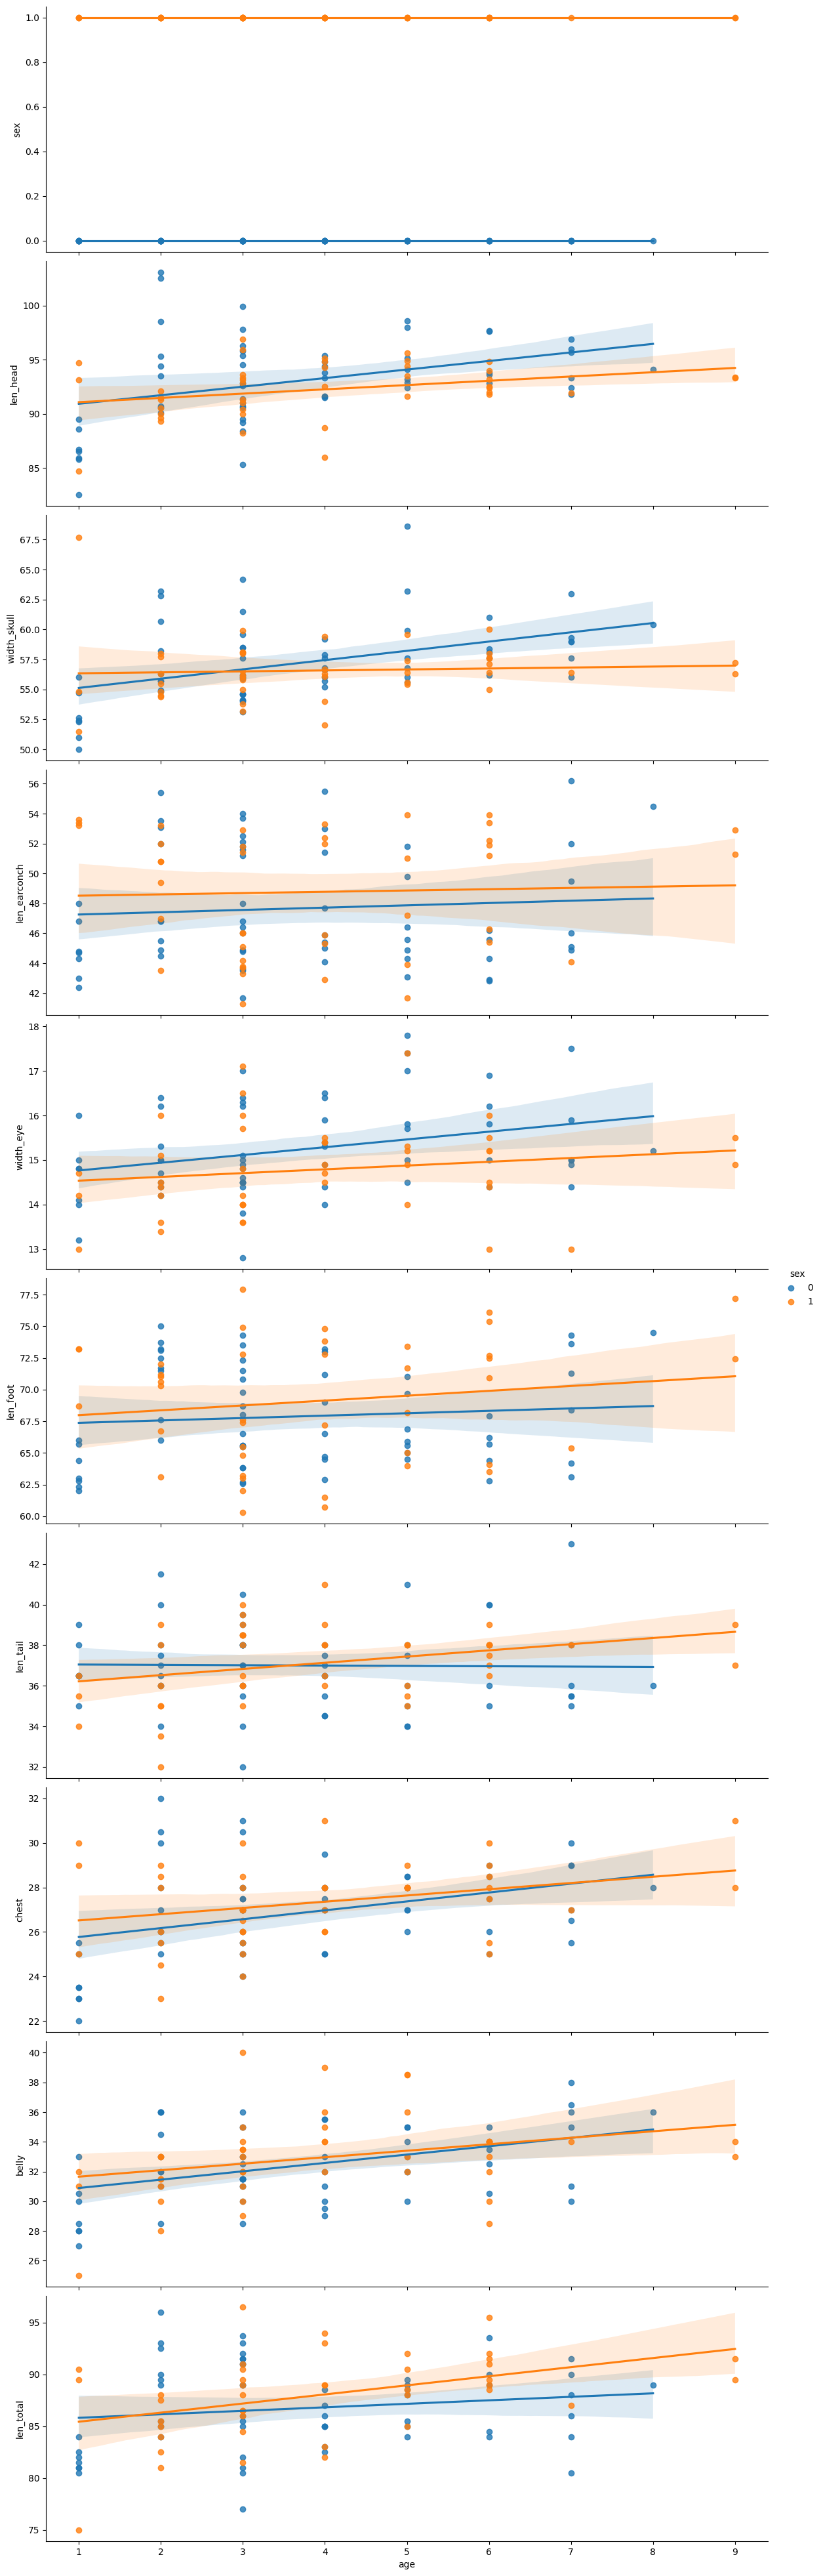

<Figure size 1200x400 with 0 Axes>

In [24]:
### Code - Pairplot
# Use seaborn's pairplot function
#sns.pairplot(possum_data, x_vars=possum_data.columns[1:], y_vars=['age'], hue='sex', kind='reg')
# Define the variables for the pairplot
x_variables = ['age']
y_variables = ['sex',  'len_head', 'width_skull', 'len_earconch', 'width_eye', 'len_foot', 'len_tail', 'chest', 'belly', 'len_total']

# Creating a pairplot
sns.pairplot(possum_data, x_vars=x_variables, y_vars=y_variables, hue='sex', kind='reg', height=4, aspect=3)

# Setting the figure size
plt.figure(figsize=(12, 4))

# Display the plot

<font color = darkorange>len_total seems most correlated with age. This is inferred from the linear regression line and the distribution of data points in the scatter plot for this. However other methods need to be considered for more accurate result>

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to first tune the hyperparameters for each model using the training set and test the overall performance of the chosen models using the test set.

**Exercise 5 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

In [25]:
### Code - Data preparation
print(possum_data.dtypes)
# Changing the type of categorical data
possum_data.sex = possum_data.sex.astype('category')
print(possum_data.dtypes)
print(possum_data.isna().sum())

sex               int64
age             float64
len_head        float64
width_skull     float64
len_earconch    float64
width_eye       float64
len_foot        float64
len_tail        float64
chest           float64
belly           float64
len_total       float64
dtype: object
sex             category
age              float64
len_head         float64
width_skull      float64
len_earconch     float64
width_eye        float64
len_foot         float64
len_tail         float64
chest            float64
belly            float64
len_total        float64
dtype: object
sex             0
age             0
len_head        0
width_skull     0
len_earconch    0
width_eye       0
len_foot        0
len_tail        0
chest           0
belly           0
len_total       0
dtype: int64


In [26]:
#preparing data for ML model
#Defining the columns names for input and targeted columns
input_columns = ['sex', 'len_head', 'width_skull', 'len_earconch', 'width_eye',
                   'len_foot', 'len_tail', 'chest', 'belly', 'len_total']
target_columns= ['age']

#extract the input and targeted data
inputs = possum_data[input_columns]
targets = possum_data[target_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs,  targets,  test_size=0.2, random_state=42)
# Output the training data
print("Training inputs:")
print(X_train)
print("\nTraining targets:")
print(y_train)


Training inputs:
   sex  len_head  width_skull  len_earconch  width_eye  len_foot  len_tail  \
89   0      89.2         54.0          44.9       12.8      63.8      38.0   
26   1      90.5         54.5          50.8       14.2      70.3      35.0   
42   0      90.7         55.9          54.0       14.6      71.5      34.0   
70   1      88.7         52.0          45.9       14.7      61.5      38.0   
15   0      91.6         56.0          51.4       14.4      73.0      34.5   
..  ..       ...          ...           ...        ...       ...       ...   
60   1      96.9         56.5          45.1       17.1      63.0      38.5   
71   0      93.8         58.1          45.6       16.9      66.2      38.0   
14   0      92.9         57.6          51.8       15.7      69.7      34.0   
92   0      94.8         55.7          47.7       14.0      66.5      38.0   
51   0     103.1         63.2          44.9       16.4      72.5      38.0   

    chest  belly  len_total  
89   24.0   31.0

<font color = darkorange> The code is performing a train-test split to a dataset in pandas DataFrame named possum_data.Which a common step in preparing data for machine learning models for data quality and suitability.I check the data types and if any values are missing but those looks fine to continue </font>

------

Regarding the k-NN, we have already get familiar with the optimization of the k value. The idea behind the k-NN is the same as previously in classification, the output isn't a class anymore but a continuous value. So, for now, we can stick to the optimal k value. However, for Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it), and try to find its optimal value for this task. After the model selection for both regression is performed, we compare the chosen models using a metric called <font color = darkorange>mean absolute error (MAE)</font>.

**Exercise 5 C)**

Train multiple ridge regression models and k-NN regression models. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation. Remember to use only the training dataset for model selection. Plot the optimal k values and lambdas versus corresponding MAEs (two different plots).

- Introduce the optimal hyperparameters for each regression model.
- How do you interpret the MAE in our case when the target variable is age?

*Note: In a `sklearn.linear_model.Ridge` class, lambda is called as "alpha" so don't get confused.*

In [27]:
### Code - CV for Ridge regression and k-NN regression
# Defining the range of hyperparameter
 # Range of alpha values (lambda)
ridge_parameters = {'alpha': [2 ** (i) for i in range(-10,11)]} 
knn_parameters = {'n_neighbors': list(range(1, 31))}
#Ridge regression
ridge_model = Ridge()

ridge_search = GridSearchCV(ridge_model, ridge_parameters, scoring='neg_mean_absolute_error', cv=LeaveOneOut())
ridge_search.fit(X_train, y_train)

# Print the optimal hyperparameters
print(ridge_search.best_estimator_, ridge_search.best_params_['alpha'])
print(ridge_parameters['alpha']

# Optimal hyperparameters
print(-ridge_search.best_score_)

Ridge(alpha=256) 256
[0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
1.4558435298389838


In [28]:
# k-NN Regression
knn_model = KNeighborsRegressor()
print(knn_parameters)
knn_search = GridSearchCV(knn_model, knn_parameters, 
                          scoring='neg_mean_absolute_error',
                          cv=LeaveOneOut())
knn_search.fit(X_train, y_train)

print(f"Optimal k for k-NN Regression: {knn_search.best_params_['n_neighbors']}")


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Optimal k for k-NN Regression: 15


Text(0, 0.5, 'Mean Absolute Error(MAE)')

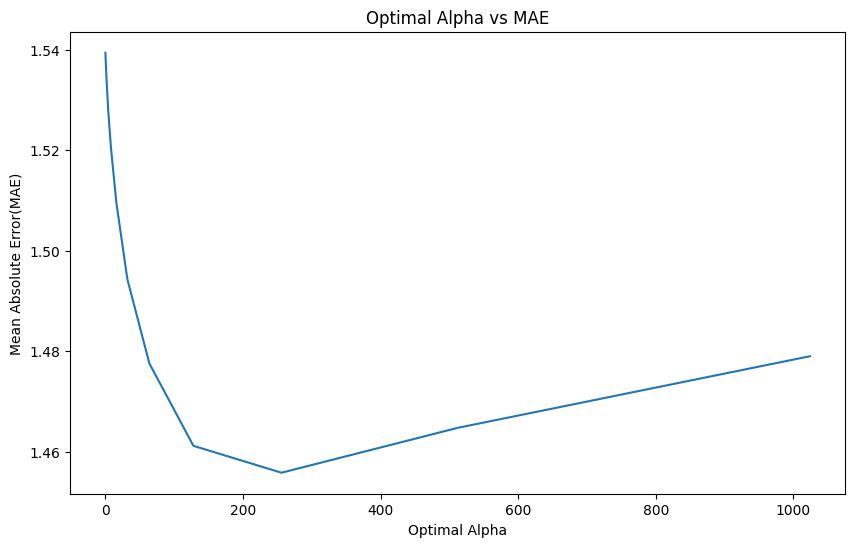

In [29]:
# Optimal alpha for Ridge Regression
optimal_alpha_ridge = ridge_search.best_params_['alpha']
# Plotting MAEs for Ridge Regression
plt.figure(figsize=(10, 6))
plt.plot(ridge_parameters['alpha'], -ridge_search.cv_results_['mean_test_score'])
plt.title('Optimal Alpha vs MAE')
plt.xlabel('Optimal Alpha')
plt.ylabel('Mean Absolute Error(MAE)')

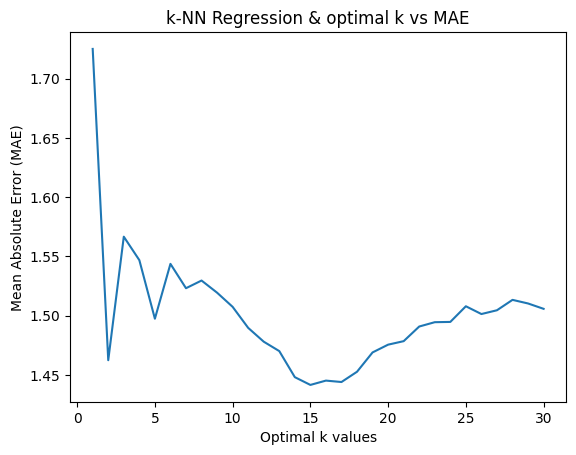

In [30]:
# Optimal k for k-NN Regression
optimal_k_knn = knn_search.best_params_['n_neighbors']
plt.plot(knn_parameters['n_neighbors'], -knn_search.cv_results_['mean_test_score'])
plt.title('k-NN Regression & optimal k vs MAE')
plt.xlabel('Optimal k values')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

<font color = darkorange> The code train multiple Ridge regression and k-NN Regression models with different hyper parameters.This also perform loo cross validation and calculate MAE for each model.The optimal hyperparameters result lowest MAE. (MAE) is a measure of errors between paired observations.The values Ridge alpha = 256 and k for k-NN regression = 15, are the values that resulted in the lowest MAE during the cross-validation process can be used for training the final models.Mean absolute error is lowest when Optimal k value is at 15.</font>